# New York Airbnb

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk(''): #directorio donde esta el dataset walk('')
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Por ejemplo, al ejecutar esto (haciendo clic en Ejecutar o presionando Shift + Enter) 
#se enumerarán todos los archivos en el directorio de entrada

In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [4]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Resumén del dataset

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 48895
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20141

Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: i

In [6]:
df.shape

(48895, 16)

In [9]:
total = df.isnull().sum().sort_values(ascending=False) #total de valores perdidos por columna ordenados 
#Porcentaje de valores perdidos respecto al total de cada columna
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total    Percent
reviews_per_month               10052  20.558339
last_review                     10052  20.558339
host_name                          21   0.042949
name                               16   0.032723
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

In [10]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(df[var].isnull().mean(),3),'% missing values')

name 0.0 % missing values
host_name 0.0 % missing values
last_review 0.206 % missing values
reviews_per_month 0.206 % missing values


## Estadísticos básicos:

In [11]:
df.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

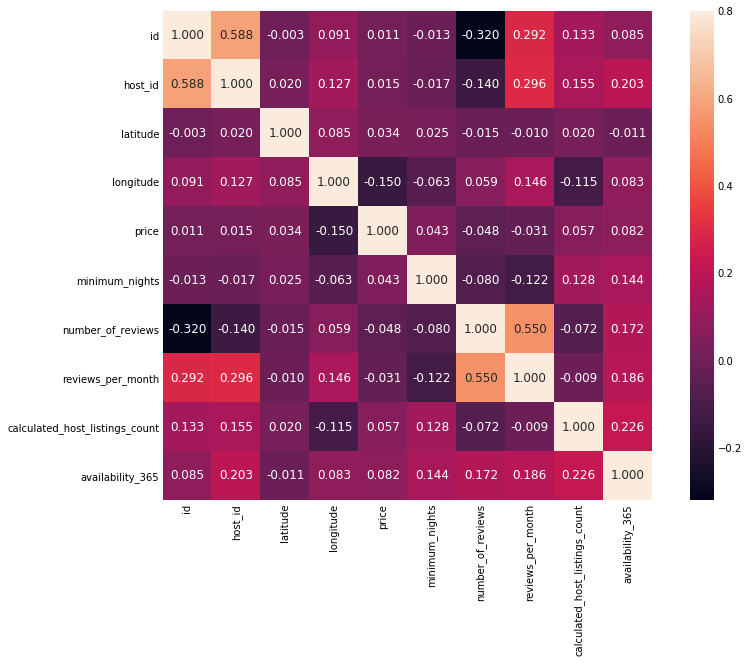

In [19]:
#correlation matrix

corrmat = df.corr() #matriz de correlación
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cbar=True, annot=True, fmt='.3f', annot_kws={'size': 12})

In [20]:
df.corr().style.background_gradient(cmap='coolwarm')

## Relación ente los missing values y los precios

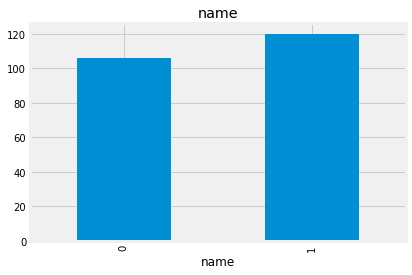

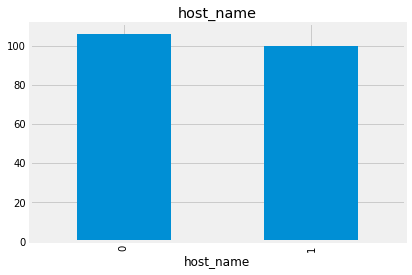

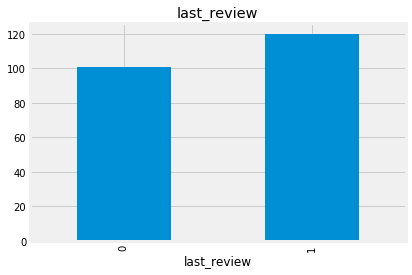

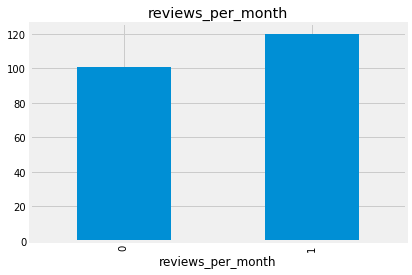

In [21]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(df,var)

## Exploratory Data Analysis *(EDA)*

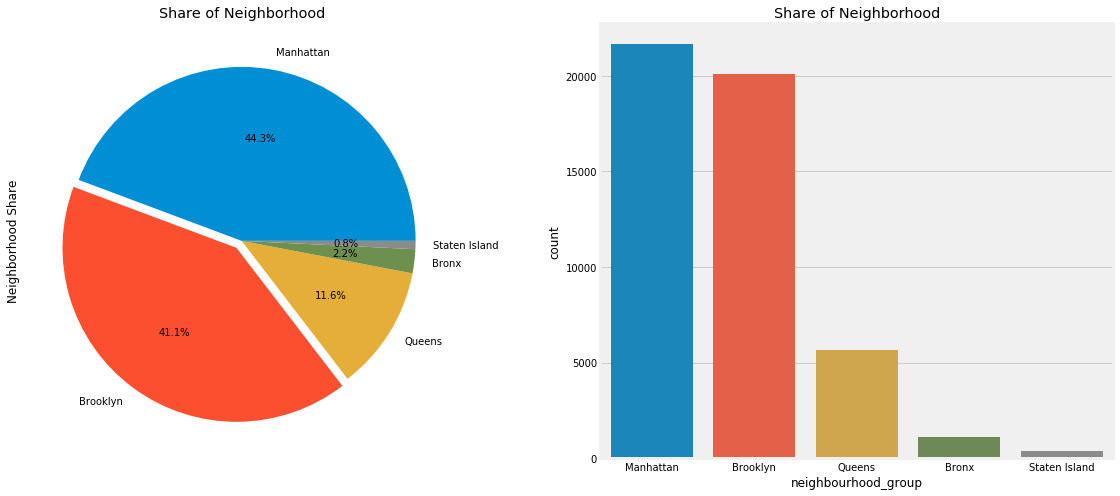

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

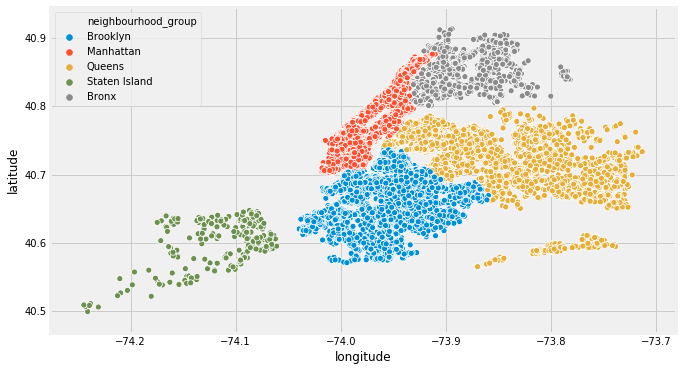

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

## Distribución de los hoteles en NYC

In [26]:
import folium
from folium.plugins import HeatMap

m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

## Cómo el precio varía con el distrito

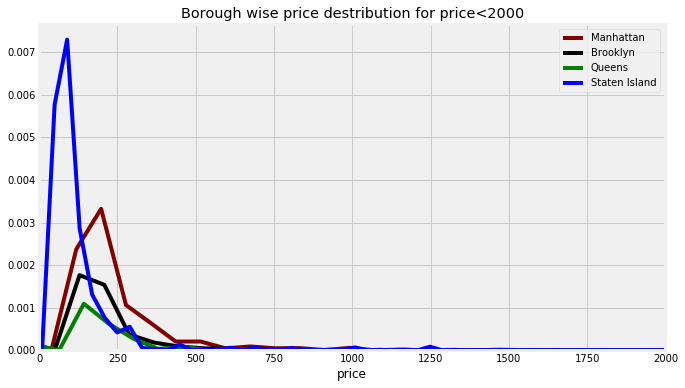

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

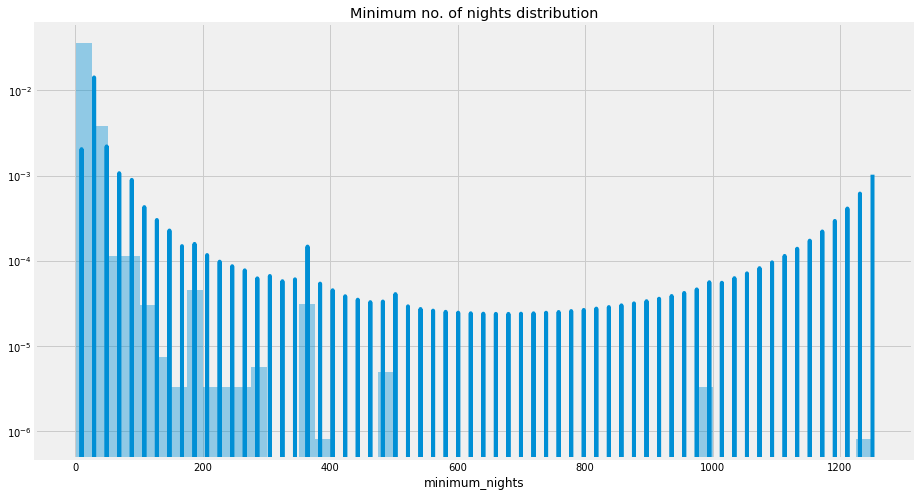

In [29]:
plt.figure(figsize=(14,8))
sns.distplot(df.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights distribution')
plt.show()

[]

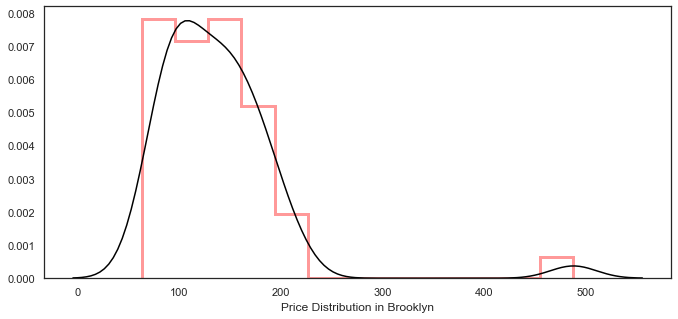

In [32]:
## setting style for our plots
sns.set(style="white", palette="spring", color_codes=True)

plt.figure(figsize=(10, 5))

## create dataframe "df1" with all the neighbourhood of Brooklyn and their price
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]

## lets take mean of all the prices of neighbouhood
d = df1.groupby("neighbourhood").mean()

## distplot -> distribution plot
## axlabel == xlabel
## kde_kws -> kernel density estimate keyword arguments -> color="black"
## hist_kws -> histogram keyword arguments -> histogram type = step
sns.distplot(d,color='r',axlabel ="Price Distribution in Brooklyn",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3});
plt.ioff()
plt.plot()

<Figure size 720x432 with 0 Axes>

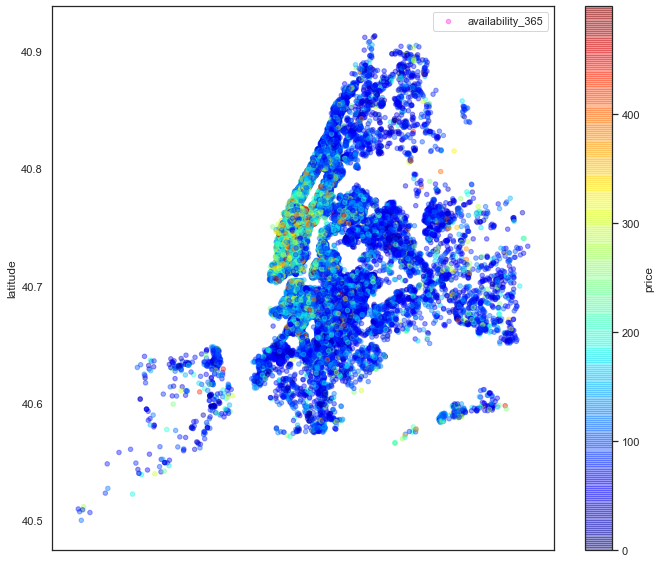

In [33]:
plt.figure(figsize=(10,6));
sub_6=df[df.price<500];
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10));
viz_4.legend();
plt.ioff()

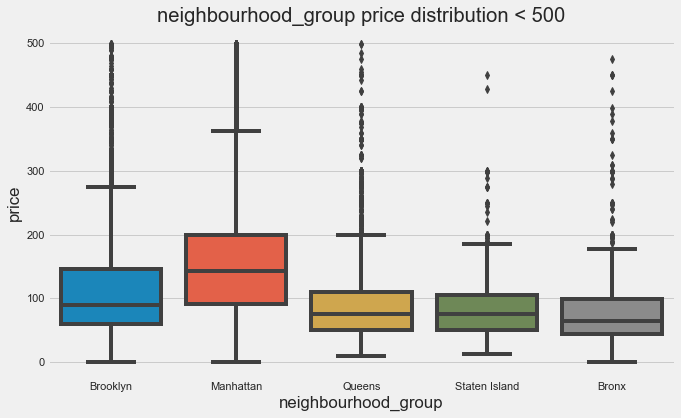

In [34]:
plt.style.use('fivethirtyeight')
ng = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

## Categorización de los precios

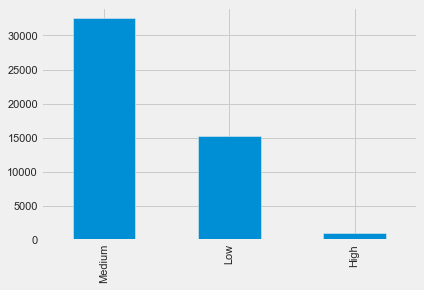

In [35]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

df['price'].apply(rank_price).value_counts().plot(kind='bar')

In [37]:
print ("Total Neighbourhoods: ", len(np.unique(df.neighbourhood)))

Total Neighbourhoods:  221


In [39]:
#agrupamos barrios por el precio medio
df_top_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

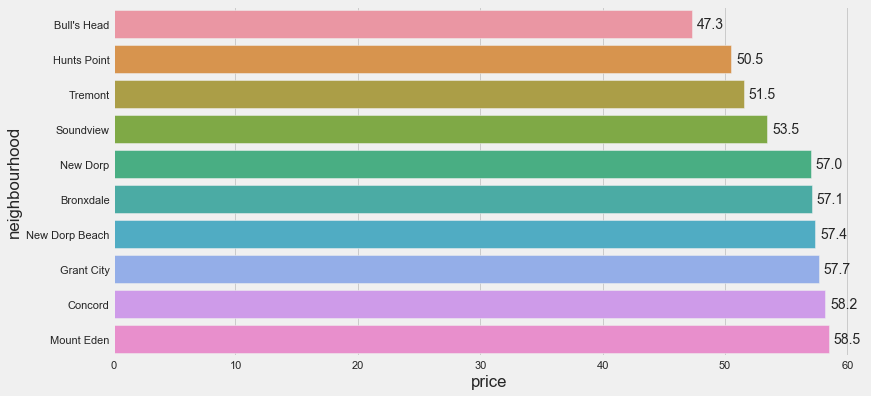

In [42]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()

#-----------------------Poner etiquetas encima de las barras---------------------------
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

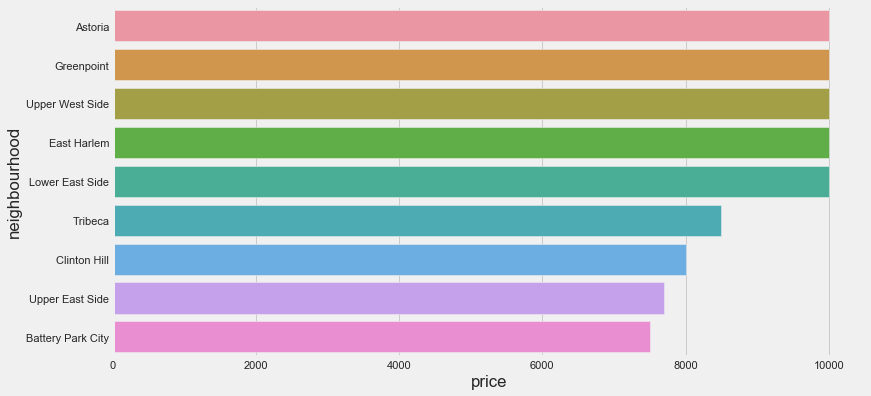

In [44]:
#los barrios con las propiedades mas caras
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df.nlargest(10,['price']))
plt.ioff()

## Detalles del tipo de habitaciones

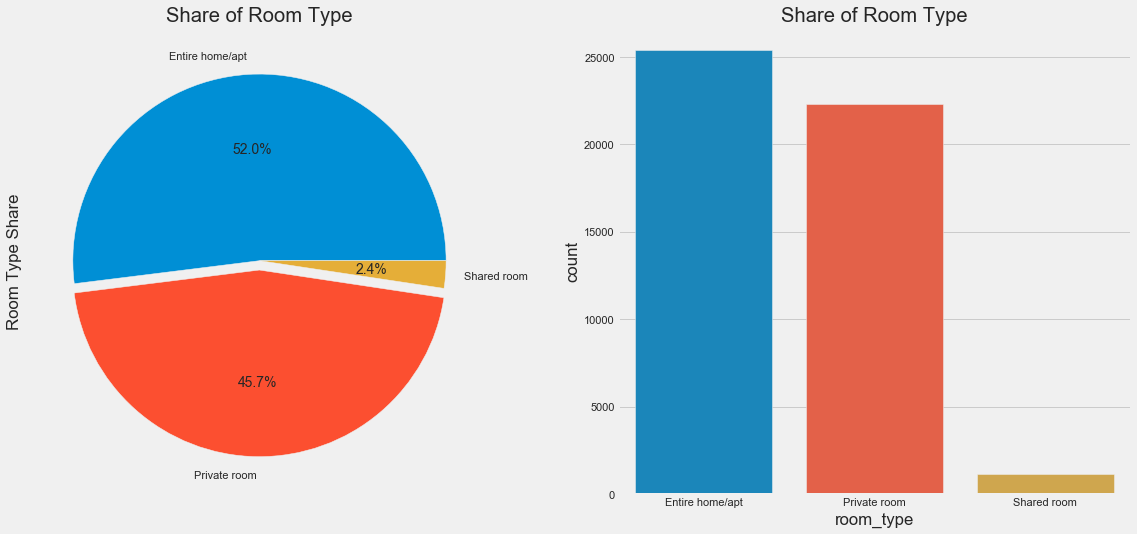

In [47]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=df,ax=ax[1],order=df['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

In [49]:
import plotly.offline as pyo
import plotly.graph_objs as go

roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

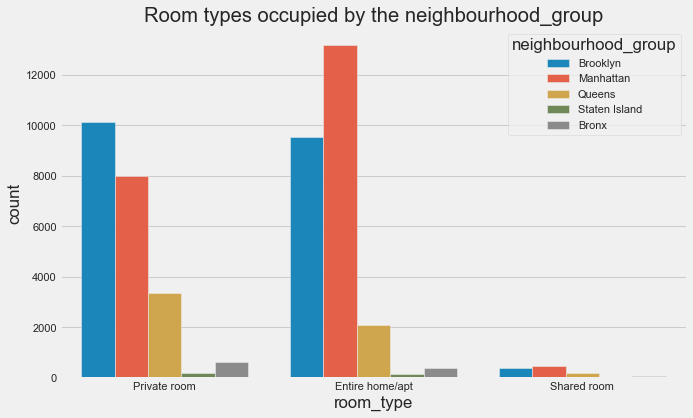

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

/home/david/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 720x432 with 0 Axes>

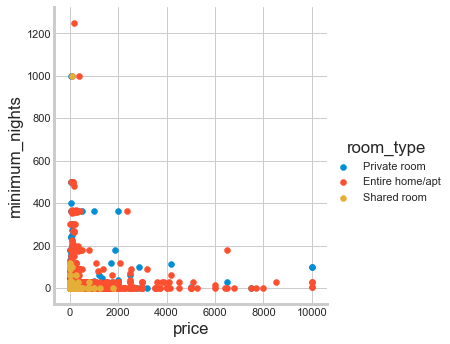

In [51]:
# soure: previous project
plt.figure(figsize=(10,6))
sns.set_style("whitegrid");
sns.FacetGrid(df,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.ioff()
plt.show()

<Figure size 720x432 with 0 Axes>

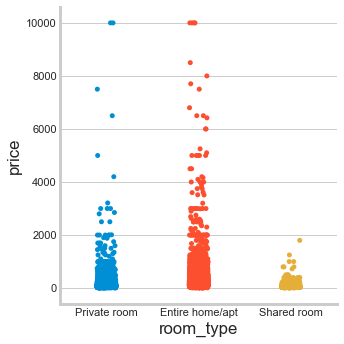

In [52]:
#catplot room type and price
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=df);
plt.ioff()

Text(0, 0.5, '')

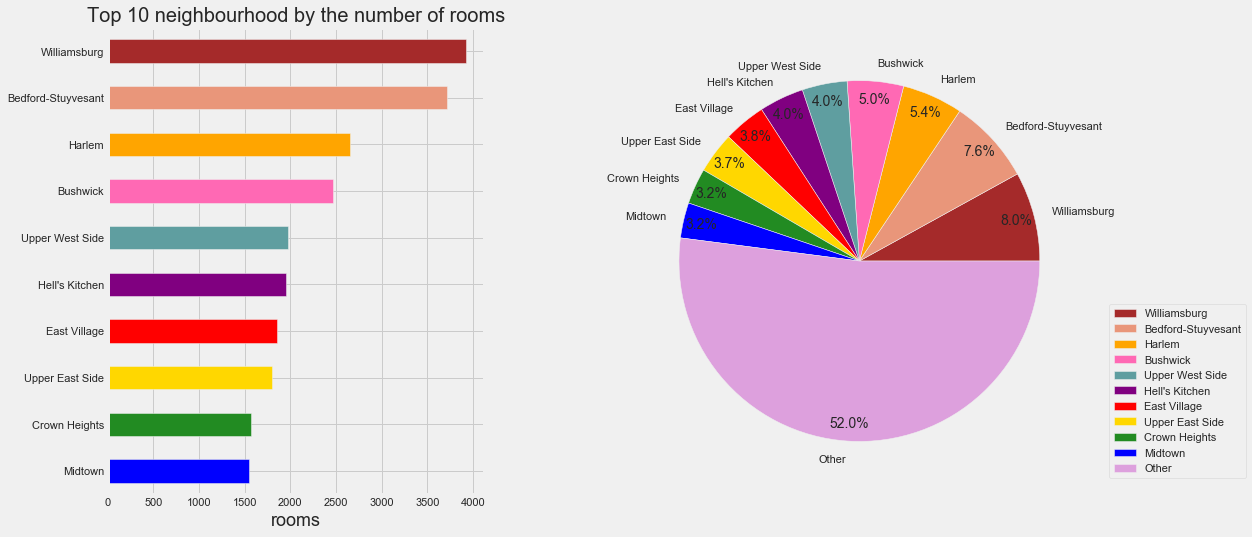

In [54]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=df['neighbourhood'].value_counts()
groups=list(df['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

## Análisis de los comentarios

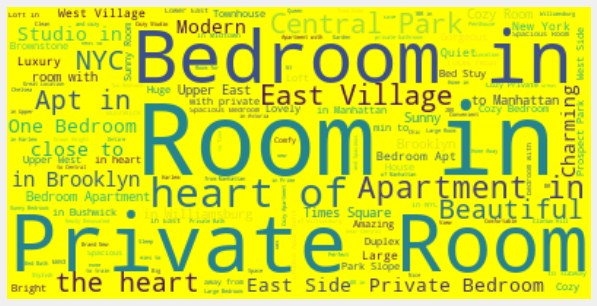

In [60]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(each) for each in df.name) #pasamos a strig cada palabra de name y añadimos espacio en blanco delante

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,5))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Columna *name*

In [61]:
_names_=[]

#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
    
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [64]:
#we are going to use counter
from collections import Counter

#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common(25)
#_top_25_w=_top_25_w[0:25]

sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

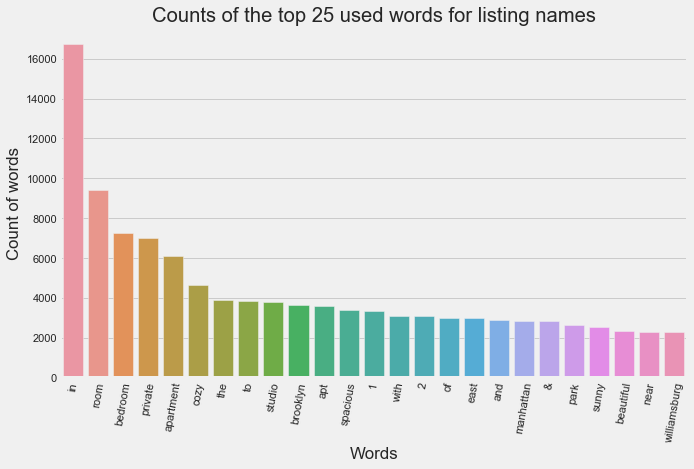

In [65]:
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

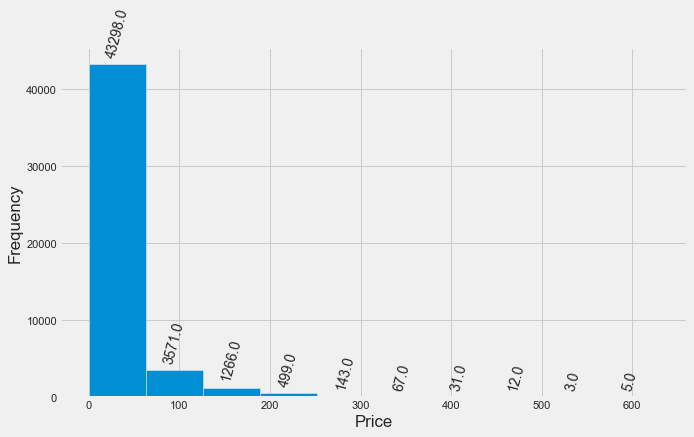

In [71]:
plt.figure(figsize=(10,6))
ax=df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()

#--------------------- Para poner las etiquetas encima de las barras-----------------------
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for
            rotation=75)                # positive and negative values.
                                        


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.show()

## Habitaciones con más comentarios

In [70]:
df2=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

neighbourhood  price
0           Kensington    149
3         Clinton Hill     89
6   Bedford-Stuyvesant     60
12         South Slope     89
15        Williamsburg    140

In [72]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

print('Rooms with the most number of reviews')

Long=-73.80
Lat=40.80

mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df2.latitude,df2.longitude,df2.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


## Disponibilidad de las habitaciones

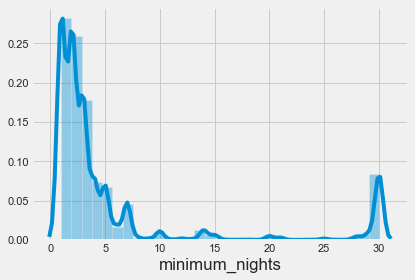

In [74]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

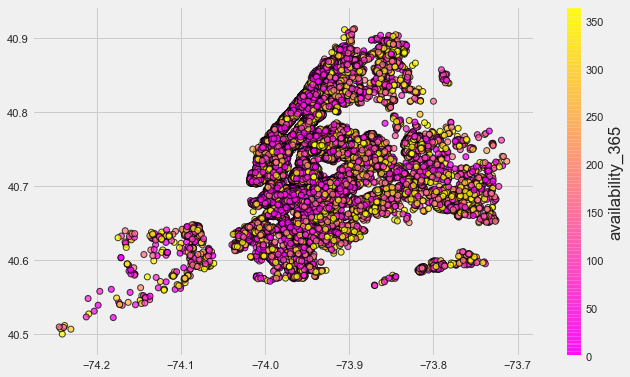

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

## Predicción de los precios usando Machine Learning

In [77]:
# Preparing the data 
df.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
df['reviews_per_month']=df['reviews_per_month'].replace(np.nan, 0)

In [78]:
'''Encode labels with value between 0 and n_classes-1. Asociamos un numero a las columnas string'''

le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

### Regresión lineal

In [79]:
'''Train LRM'''
lm = LinearRegression()

X = df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {} %
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts)*100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357 %
        Mean Absolute Error: 72.86091366825617
     


### Valores actuales Vs. predichas por nuestro modelo

In [83]:
error_df = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_df.head(5)

Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753

In [84]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_df.index, y=error_df['Predicted Values']),
    go.Bar(name='Actual', x=error_df.index, y=error_df['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

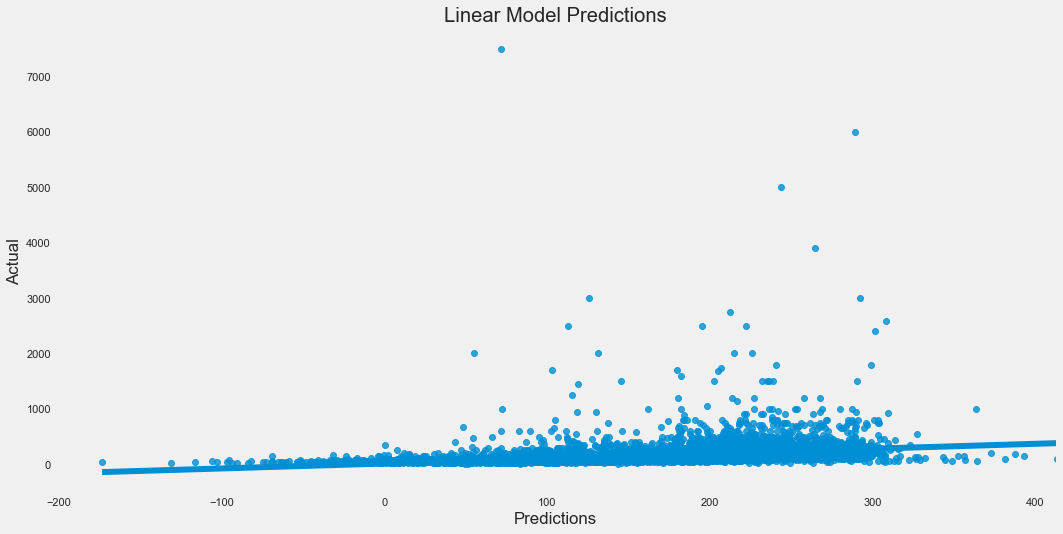

In [85]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

## Gradiente de Regresión lineal Boosted

In [86]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.72811068627544
        R2 Score: 16.466614749398733
        Mean Absolute Error: 63.97012839373709
     


In [88]:
error_df = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_df.head(5)

Actual Values  Predicted Values
0            400        125.903567
1            140        156.575618
2            195        161.337522
3            120         94.543442
4             88         71.978409

In [89]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_df.index, y=error_df['Predicted Values']),
    go.Bar(name='Actual', x=error_df.index, y=error_df['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

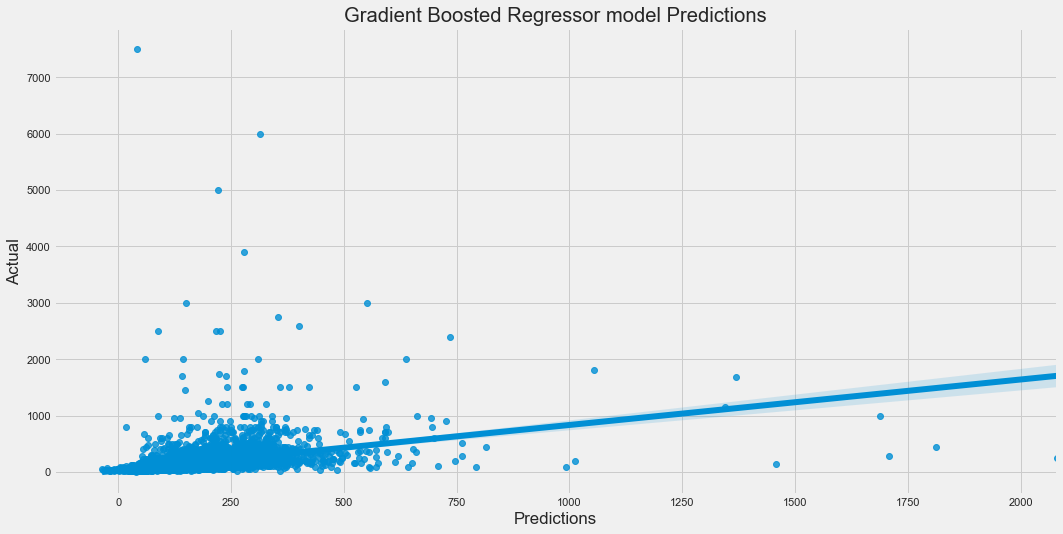

In [90]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()